## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_count = len(combined_mouse_data["Mouse ID"].unique())
summary_df = pd.DataFrame({"Mouse Count": [mouse_count]})

summary_df
                        

,Mouse Count
0,249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_mouse_data.loc[combined_mouse_data.duplicated(["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

duplicate_mice


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_mouse_data.loc[combined_mouse_data["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_mouse_data.loc[combined_mouse_data["Mouse ID"]!="g989"]
# combined_mouse_data.drop_duplicates(keep="first")
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = len(clean_data["Mouse ID"].unique())
summary_df = pd.DataFrame({"Mouse Count": [mouse_count2]})

summary_df

,Mouse Count
0,248


## Summary Statistics

In [8]:
drug_group = clean_data.groupby("Drug Regimen")
count_groups = drug_group['Drug Regimen'].count()
count_groups


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

In [9]:
# Generate a summary statistics table of mean, 

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_group = clean_data.groupby("Drug Regimen")
tumor_volume = clean_data['Tumor Volume (mm3)']

mean_numpy = drug_group.mean()['Tumor Volume (mm3)']
median_numpy = drug_group.median()['Tumor Volume (mm3)']
var_numpy = drug_group.var()['Tumor Volume (mm3)']
std_numpy = drug_group.std()['Tumor Volume (mm3)']
sem_numpy = drug_group.sem()['Tumor Volume (mm3)']


mean_numpy
median_numpy
var_numpy
std_numpy

# mean_numpy = np.mean(tumor_volume)
# median_numpy = np.median(tumor_volume)
# var_numpy = np.var(tumor_volume,ddof = 0)
# sd_numpy = np.std(tumor_volume,ddof = 0)


stats_df = pd.DataFrame({"Mean":mean_numpy,
                            "Median": median_numpy,
                            "Variance": var_numpy,
                             "Standard Deviation": std_numpy,
                            "SEM": sem_numpy})
stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats_df2 = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
stats_df2

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

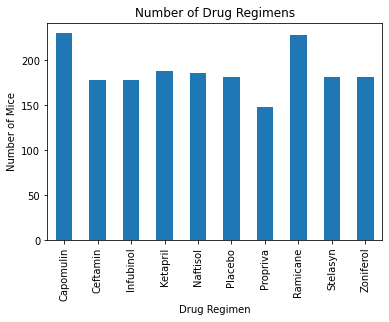

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.


# Split up our data into groups based upon 'gender'
drug_group = clean_data.groupby("Drug Regimen")



# Find out how many of each gender took bike trips
count_groups = drug_group['Drug Regimen'].count()

# Drop the 'stoptime' row that is contained within our group


# Chart our data, give it a title, and label the axes
drug_chart = count_groups.plot(kind="bar", title="Number of Drug Regimens")
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()

In [12]:
count_groups

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

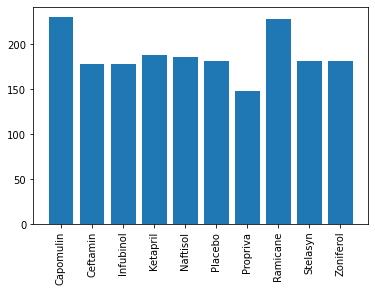

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(count_groups.index.values, count_groups.values)
plt.xticks(rotation="vertical")


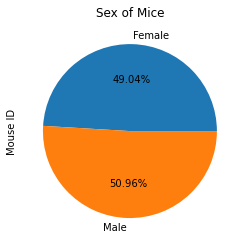

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_data.groupby("Sex").count()["Mouse ID"]
drug_chart = gender_group.plot(kind="pie", title="Sex of Mice", autopct="%2.2f%%")


In [15]:
gender_group

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

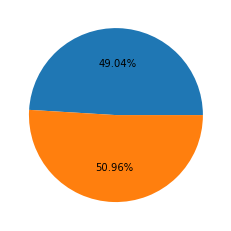

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_group.values, autopct="%2.2f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#.max for each mouse ID, pull tumor volume
max_tp = clean_data.groupby("Mouse ID").max()["Timepoint"]
max_tp = max_tp.reset_index() 


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_max = pd.merge(max_tp, clean_data, how="left", on=["Mouse ID", "Timepoint"])
tumor_vol_max  



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
drug_tumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in drug_list:
    drug_vol = tumor_vol_max.loc[tumor_vol_max["Drug Regimen"]==x]["Tumor Volume (mm3)"]
    drug_tumor.append(drug_vol)
    quartiles = drug_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = drug_vol.loc[(drug_vol< lower_bound) | (drug_vol> upper_bound)]
    print(outliers)
    

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


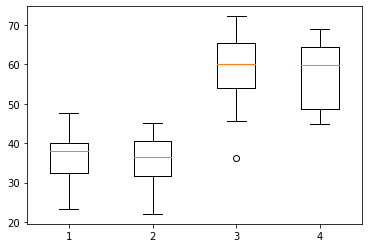

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drug_tumor)

plt.show()

## Line and Scatter Plots

In [20]:
mouse_data_df = clean_data.set_index("Mouse ID")
mouse_data_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


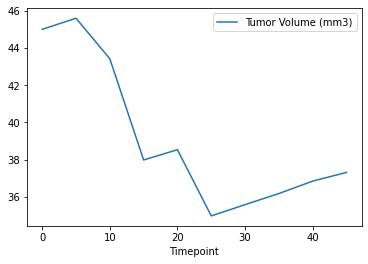

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tum_v_time = mouse_data_df.loc[["i738"],["Tumor Volume (mm3)", "Timepoint"]]
tum_v_time.plot.line(x="Timepoint", y="Tumor Volume (mm3)")



In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
drug_data_df = clean_data.set_index("Drug Regimen")
drug_data_df
                                

# tumor_volume = only_capomulin.iloc[:,1]
# timepoint = only_capomulin.iloc[:,2]
# plt.scatter(timepoint, tumor_volume)
# plt.xticks(timepoint, rotation=90)
# plt.xlabel('Timepoint')
# plt.ylabel('Tumor Volume (mm3)')
# plt.show()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,25,63.145652,2
Naftisol,z969,Male,9,30,30,65.841013,3
Naftisol,z969,Male,9,30,35,69.176246,4


In [28]:
only_capomulin = drug_data_df.loc[["Capomulin"],["Tumor Volume (mm3)", "Weight (g)"]]
only_capomulin



,Tumor Volume (mm3),Weight (g)
Drug Regimen,,
Capomulin,45.000000,17
Capomulin,43.878496,17
Capomulin,37.614948,17
Capomulin,38.177232,17
Capomulin,36.866876,17
...,...,...
Capomulin,47.685963,24
Capomulin,45.000000,25
Capomulin,45.597064,25


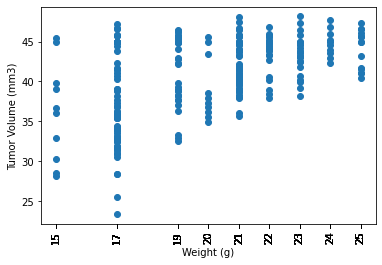

In [41]:

tumor_volume = only_capomulin.iloc[:,0]
weight = only_capomulin.iloc[:,1]
plt.scatter(weight, tumor_volume)
plt.xticks(weight, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

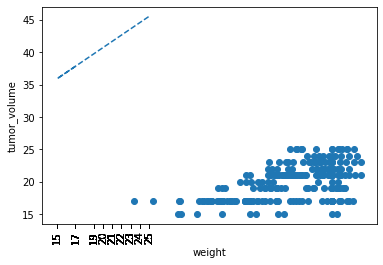

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen





vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(tumor_volume, weight)
vc_fit = vc_slope * weight + vc_int


tumor = only_capomulin.iloc[:, 0]
aa_slope, aa_int, aa_r, aa_p, aa_std_err = st.linregress(
    weight, tumor_volume)
aa_fit = aa_slope * weight + aa_int
plt.scatter(tumor_volume, weight)
plt.plot(weight,aa_fit,"--")
plt.xticks(weight, rotation=90)
plt.xlabel('weight')
plt.ylabel('tumor_volume')
plt.show()